# Introduction
Social Media has been taking up everything on the Internet. People getting the latest news, useful resources, life partner and what not. In a world where Social media plays a big role in giving news, we must also know that news which affects our sentiments are going to get spread like a wildfire.

Based on the Headline and the title, and according to the date given and the Social media platforms, you have to predict how it has affected the human sentiment scores. You have to predict the column “SentimentTitle” and “SentimentHeadline”.


# Data Desciption:

IDLink: Unique identifiers for each row.

Title: Short summaries of the articles.

Headline: Detailed descriptions of the articles' content.

Source: The origin of the articles.

Topic: The subject matter or category of the articles.

PublishDate: Date and time of article publication.

Facebook: Number of interactions on Facebook.

GooglePlus: Number of interactions on Google Plus.

LinkedIn: Number of interactions on LinkedIn.

SentimentTitle: Sentiment analysis scores or labels for article titles.

SentimentHeadline: Sentiment analysis scores or labels for article headlines.

Here, I have predicted the sentiment score of the Title and the Headline of the news articles.

The target columns are:
- `SentimentTitle`, which is the sentiment score of the Title
- `SentimentHeadline`, which is the sentiment score of the Headline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("train_file.csv")

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


# Exploratory Data Analysis (EDA)

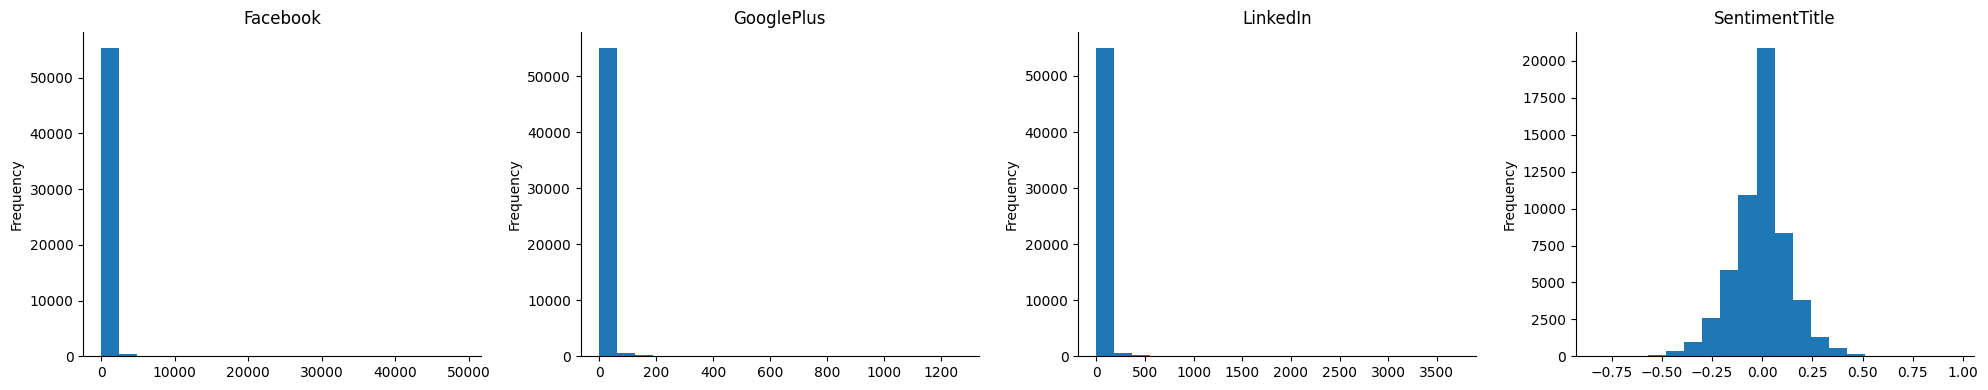

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # 1 row, 4 columns

# Facebook
df['Facebook'].plot(kind='hist', bins=20, title='Facebook', ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)

# GooglePLus
df['GooglePlus'].plot(kind='hist', bins=20, title='GooglePlus', ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)

#  LinkedIn
df['LinkedIn'].plot(kind='hist', bins=20, title='LinkedIn', ax=axes[2])
axes[2].spines[['top', 'right',]].set_visible(False)

# SentimentTitle
df['SentimentTitle'].plot(kind='hist', bins=20, title='SentimentTitle', ax=axes[3])
axes[3].spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

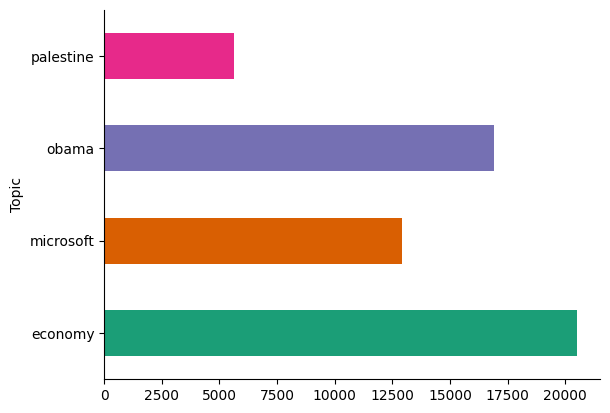

In [ ]:
# @title Topic
df.groupby('Topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

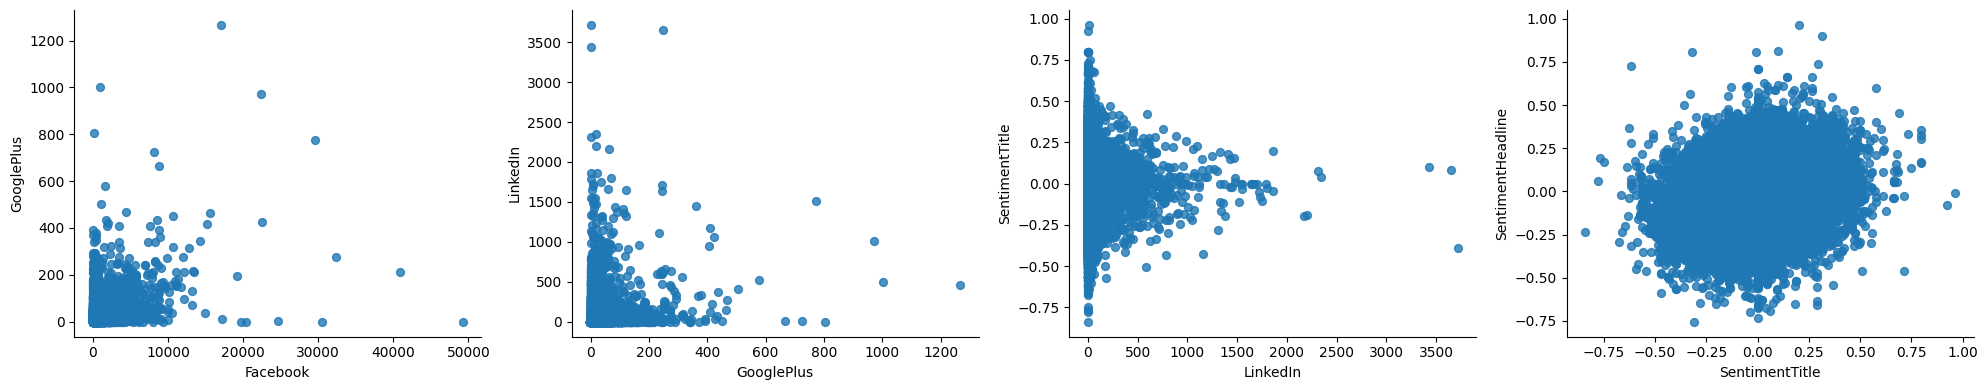

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))  # 1 row, 4 columns

#  Facebook vs GooglePlus
df.plot(kind='scatter', x='Facebook', y='GooglePlus', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)


# GooglePlus vs LinkedIn
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GooglePlus', y='LinkedIn', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)

# LinkedIn vs SentimentTitle
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='LinkedIn', y='SentimentTitle', s=32, alpha=.8, ax=axes[2])
axes[2].spines[['top', 'right',]].set_visible(False)

# SentimentTitle vs SentimentHeadline
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SentimentTitle', y='SentimentHeadline', s=32, alpha=.8, ax=axes[3])
axes[3].spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

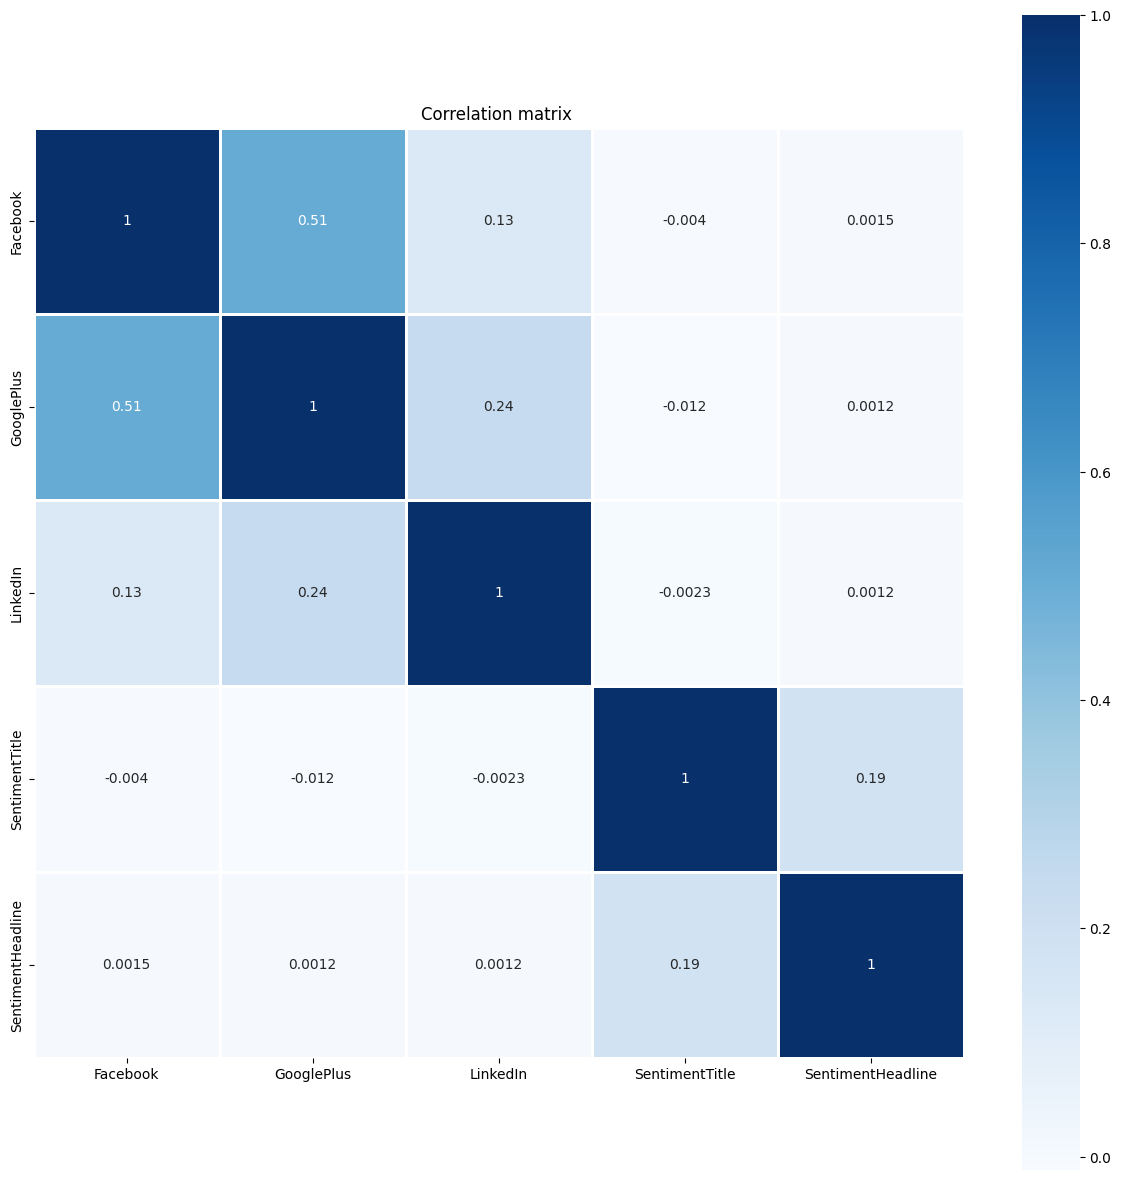

In [ ]:
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=1,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [ ]:
# Convert 'PublishDate' to datetime
df['PublishDate'] = pd.to_datetime(df['PublishDate'])

In [ ]:
# Extract year, month, and day from 'PublishDate'
df['Year'] = df['PublishDate'].dt.year
df['Month'] = df['PublishDate'].dt.month
df['Day'] = df['PublishDate'].dt.day

In [ ]:
# Drop unnecessary columns
df.drop(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate'], axis=1, inplace=True)

In [ ]:
# Split the data into features and target variables
X = df.drop(['SentimentTitle', 'SentimentHeadline'], axis=1)
y_title = df['SentimentTitle']
y_headline = df['SentimentHeadline']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_title, y_test_title = train_test_split(X_scaled, y_title, test_size=0.2, random_state=42)
_, _, y_train_headline, y_test_headline = train_test_split(X_scaled, y_headline, test_size=0.2, random_state=42)

# Linear Regression

In [ ]:
# Linear Regression for SentimentTitle
model_title = LinearRegression()
model_title.fit(X_train, y_train_title)

LinearRegression()

In [ ]:
# Predict
y_pred_title = model_title.predict(X_test)

In [ ]:
# Calculate RMSE (Root Mean Squared Error) for SentimentTitle
from sklearn.metrics import mean_absolute_error
rmse_title = mean_squared_error(y_test_title, y_pred_title, squared=False)
print(f"RMSE for SentimentTitle: {rmse_title}")

# Calculate Mean Absolute Error
mae_title = mean_absolute_error(y_test_title, y_pred_title)

RMSE for SentimentTitle: 0.13773337037858077


In [ ]:
# Linear Regression for SentimentHeadline
model_headline = LinearRegression()
model_headline.fit(X_train, y_train_headline)

LinearRegression()

In [ ]:
# Predict
y_pred_headline = model_headline.predict(X_test)

In [ ]:
# Calculate RMSE (Root Mean Squared Error) for SentimentHeadline
rmse_headline = mean_squared_error(y_test_headline, y_pred_headline, squared=False)
print(f"RMSE for SentimentHeadline: {rmse_headline}")

# Calculate Mean Absolute Error
mae_headline = mean_absolute_error(y_test_headline, y_pred_headline)

score=1-((0.4*mae_title)+(0.6*mae_headline))
print("Score = {} \nScore(out of 100%) = {}%".format(score,score*100))

RMSE for SentimentHeadline: 0.14239960696911388
Score = 0.8954747607283349 
Score(out of 100%) = 89.54747607283349%


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor for SentimentTitle
dt_model_title = DecisionTreeRegressor(random_state=42)
dt_model_title.fit(X_train, y_train_title)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict
y_pred_dt_title = dt_model_title.predict(X_test)
# Calculate RMSE for Decision Tree Regressor - SentimentTitle
rmse_dt_title = mean_squared_error(y_test_title, y_pred_dt_title, squared=False)
print(f"RMSE for Decision Tree Regressor - SentimentTitle: {rmse_dt_title}")

# Calculate Mean Absolute Error
mae_title_dt = mean_absolute_error(y_test_title, y_pred_dt_title)

RMSE for Decision Tree Regressor - SentimentTitle: 0.17724264848053398


In [ ]:
# Decision Tree Regressor for SentimentHeadline
dt_model_headline = DecisionTreeRegressor(random_state=42)
dt_model_headline.fit(X_train, y_train_headline)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict
y_pred_dt_headline = dt_model_headline.predict(X_test)

# Calculate RMSE for Decision Tree Regressor - SentimentHeadline
rmse_dt_headline = mean_squared_error(y_test_headline, y_pred_dt_headline, squared=False)
print(f"RMSE for Decision Tree Regressor - SentimentHeadline: {rmse_dt_headline}")

mae_headline_dt = mean_absolute_error(y_test_headline, y_pred_dt_headline)

# Calculate score
score_dt = 1 - ((0.4 * mae_title_dt) + (0.6 * mae_headline_dt))

print("Score = {} \nScore (out of 100%) = {}%".format(score_dt, score_dt * 100))

RMSE for Decision Tree Regressor - SentimentHeadline: 0.18354088663669446
Score = 0.8628769898015839 
Score (out of 100%) = 86.2876989801584%


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor for SentimentTitle
rf_model_title = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_title.fit(X_train, y_train_title)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred_rf_title = rf_model_title.predict(X_test)

# Calculate RMSE for Random Forest Regressor - SentimentTitle
rmse_rf_title = mean_squared_error(y_test_title, y_pred_rf_title, squared=False)
print(f"RMSE for Random Forest Regressor - SentimentTitle: {rmse_rf_title}")

# Calculate Mean Absolute Error
mae_title_rf = mean_absolute_error(y_test_title, y_pred_rf_title)


RMSE for Random Forest Regressor - SentimentTitle: 0.1430282886355892


In [ ]:
# Random Forest Regressor for SentimentHeadline
rf_model_headline = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_headline.fit(X_train, y_train_headline)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred_rf_headline = rf_model_headline.predict(X_test)

# Calculate RMSE for Random Forest Regressor - SentimentHeadline
rmse_rf_headline = mean_squared_error(y_test_headline, y_pred_rf_headline, squared=False)
print(f"RMSE for Random Forest Regressor - SentimentHeadline: {rmse_rf_headline}")
mae_headline_rf = mean_absolute_error(y_test_headline, y_pred_rf_headline)

# Calculate score
score_rf = 1 - ((0.4 * mae_title_rf) + (0.6 * mae_headline_rf))

print("Score = {} \nScore (out of 100%) = {}%".format(score_rf, score_rf * 100))

RMSE for Random Forest Regressor - SentimentHeadline: 0.1493963176682112
Score = 0.8885866468831275 
Score (out of 100%) = 88.85866468831274%


# HyperParameter Tuning using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree Regressor for SentimentTitle
dt_model_title = DecisionTreeRegressor(random_state=42)
grid_search_title = GridSearchCV(dt_model_title, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_title.fit(X_train, y_train_title)

# Best hyperparameters for SentimentTitle
best_params_title = grid_search_title.best_params_
print("Best Hyperparameters for SentimentTitle:", best_params_title)

Best Hyperparameters for SentimentTitle: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
# Predict
y_pred_dt_title_tuned = grid_search_title.predict(X_test)

# Calculate RMSE for Tuned Decision Tree Regressor - SentimentTitle
rmse_dt_title_tuned = mean_squared_error(y_test_title, y_pred_dt_title_tuned, squared=False)
print(f"RMSE for Tuned Decision Tree Regressor - SentimentTitle: {rmse_dt_title_tuned}")

mae_title_hdt=mean_absolute_error(y_test_title,y_pred_dt_title_tuned)


# Decision Tree Regressor for SentimentHeadline
dt_model_headline = DecisionTreeRegressor(random_state=42)
grid_search_headline = GridSearchCV(dt_model_headline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_headline.fit(X_train, y_train_headline)

# Best hyperparameters for SentimentHeadline
best_params_headline = grid_search_headline.best_params_
print("Best Hyperparameters for SentimentHeadline:", best_params_headline)

RMSE for Tuned Decision Tree Regressor - SentimentTitle: 0.137662923403835
Best Hyperparameters for SentimentHeadline: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Predict
y_pred_dt_headline_tuned = grid_search_headline.predict(X_test)

# Calculate RMSE for Tuned Decision Tree Regressor - SentimentHeadline
rmse_dt_headline_tuned = mean_squared_error(y_test_headline, y_pred_dt_headline_tuned, squared=False)
print(f"RMSE for Tuned Decision Tree Regressor - SentimentHeadline: {rmse_dt_headline_tuned}")

mae_headline_hdt=mean_absolute_error(y_test_headline,y_pred_dt_headline_tuned)
score_hdt=1-((0.4*mae_title_hdt)+(0.6*mae_headline_hdt))
print("Score = {} \nScore(out of 100%) = {}%".format(score_hdt,score_hdt*100))

RMSE for Tuned Decision Tree Regressor - SentimentHeadline: 0.14248007147842476
Score = 0.895468978258742 
Score(out of 100%) = 89.54689782587421%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest Regressor for SentimentTitle
rf_model_title = RandomForestRegressor(random_state=42)
grid_search_title = GridSearchCV(rf_model_title, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_title.fit(X_train, y_train_title)

# Best hyperparameters for SentimentTitle
best_params_title = grid_search_title.best_params_
print("Best Hyperparameters for SentimentTitle:", best_params_title)

Best Hyperparameters for SentimentTitle: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Predict
y_pred_rf_title_tuned = grid_search_title.predict(X_test)

# Calculate RMSE for Tuned Random Forest Regressor - SentimentTitle
rmse_rf_title_tuned = mean_squared_error(y_test_title, y_pred_rf_title_tuned, squared=False)
print(f"RMSE for Tuned Random Forest Regressor - SentimentTitle: {rmse_rf_title_tuned}")

mae_title_rfh=mean_absolute_error(y_test_title,y_pred_rf_title_tuned)

# Random Forest Regressor for SentimentHeadline
rf_model_headline = RandomForestRegressor(random_state=42)
grid_search_headline = GridSearchCV(rf_model_headline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_headline.fit(X_train, y_train_headline)

# Best hyperparameters for SentimentHeadline
best_params_headline = grid_search_headline.best_params_
print("Best Hyperparameters for SentimentHeadline:", best_params_headline)

RMSE for Tuned Random Forest Regressor - SentimentTitle: 0.13698456766470918
Best Hyperparameters for SentimentHeadline: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Predict
y_pred_rf_headline_tuned = grid_search_headline.predict(X_test)

# Calculate RMSE for Tuned Random Forest Regressor - SentimentHeadline
rmse_rf_headline_tuned = mean_squared_error(y_test_headline, y_pred_rf_headline_tuned, squared=False)
print(f"RMSE for Tuned Random Forest Regressor - SentimentHeadline: {rmse_rf_headline_tuned}")

mae_headline_rfh=mean_absolute_error(y_test_headline,y_pred_rf_headline_tuned)
score_rfh=1-((0.4*mae_title_rfh)+(0.6*mae_headline_rfh))

print("Score = {} \nScore(out of 100%) = {}%".format(score_rfh,score_rfh*100))

RMSE for Tuned Random Forest Regressor - SentimentHeadline: 0.14226589364273762
Score = 0.8955124747200224 
Score(out of 100%) = 89.55124747200223%


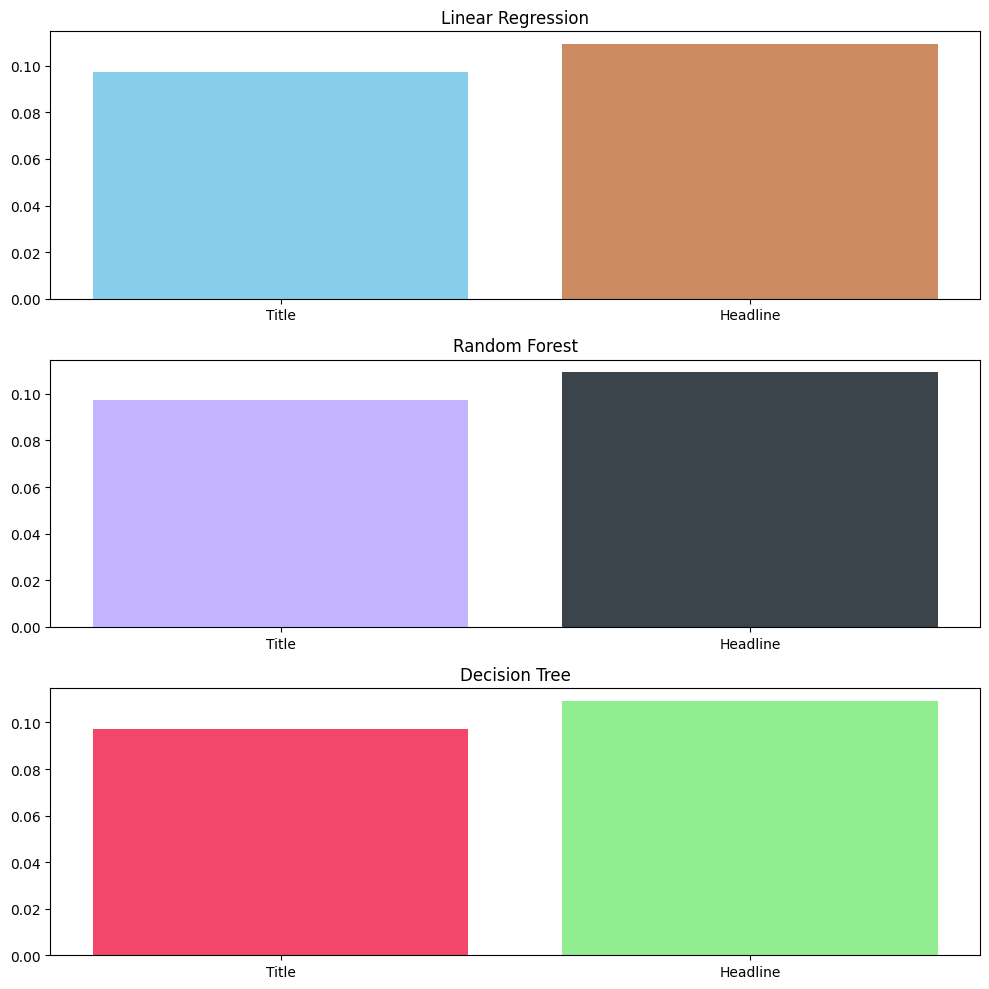

In [ ]:
# Plotting bar graphs for each model and each sentiment
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
sentiments = ['Title', 'Headline']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plot for Linear Regression
axs[0].bar(sentiments, [mae_title, mae_headline], color=['skyblue', '#CD8B62'])
axs[0].set_title('Linear Regression')

# Plot for Random Forest
axs[1].bar(sentiments, [mae_title_rfh, mae_headline_rfh], color=['#C3B5FF', '#3B444B'])
axs[1].set_title('Random Forest')

# Plot for Decision Tree
axs[2].bar(sentiments, [mae_title_hdt, mae_headline_hdt], color=["#F2476A", "#90EE90"])
axs[2].set_title('Decision Tree')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

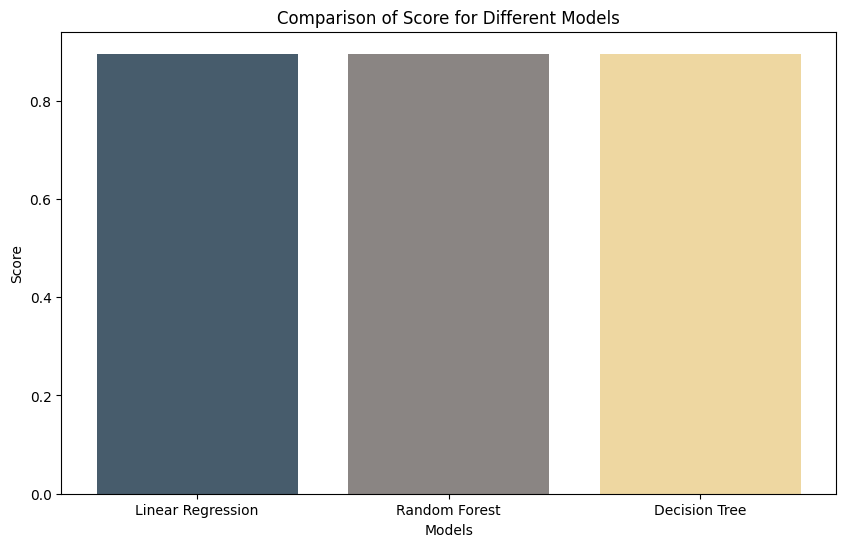

In [ ]:
# Plot the MSE for each model
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
Score = [score,score_hdt,score_rfh]

plt.figure(figsize=(10, 6))
plt.bar(models, Score, color=['#475C6C', '#8A8583', '#EED7A1'])
plt.title('Comparison of Score for Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()